In [9]:
import os
import matplotlib.pyplot as plt
import nibabel as nb
import numpy as np
import cv2
import _3dpu_mehdi as mehdi
from _3dpu import *

In [3]:
!pip3 install ipympl
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\0\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [78]:
chemin = r"C:\Users\0\OneDrive\Documents\Montréal 4A\Les études\Chair AI-SCALE\ph_1.nii"
chemin_mag = r"C:\Users\0\OneDrive\Documents\Montréal 4A\Les études\Chair AI-SCALE\mag_1.nii"
chemin2 = r"C:\Users\0\Downloads\TGVQSM-plus\TGVQSM-master-011045626121baa8bfdd6633929974c732ae35e3\test_data\epi3d_test_phase.nii"
chemin3 = r"C:\Users\0\Downloads\20170327_qsm2016_recon_challenge\20170327_qsm2016_recon_challenge\data\phs_wrap.nii"
phase_image = nb.load(chemin)
mag_imgae = nb.load(chemin_mag)
phase_image2 = nb.load(chemin2)
phase_image3 = nb.load(chemin3)
x_min,x_max = 50,130
y_min,y_max = 50,130
z_min,z_max = 20,60
t = 1
data = phase_image.get_data()[:,:,:,t]
mag_data = mag_imgae.get_data()[:,:,:,t]
# data = phase_image2.get_data()
# data3 = phase_image3.get_data()

C:\Users\0\AppData\Local\Temp\ipykernel_8244\2482561751.py:13: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  data = phase_image.get_data()[:,:,:,t]
C:\Users\0\AppData\Local\Temp\ipykernel_8244\2482561751.py:14: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mag_data = mag_imgae.get_data()[:,:,:,t]


In [12]:
blur = 21
canny_low = 15
canny_high = 150
min_area = 0.0005
max_area = 0.95
dilate_iter = 10
erode_iter = 10
mask_color = (0.0,0.0,0.0) 


def mask(im):
    mask = np.zeros(im.shape, dtype = np.uint8)

    edges = cv2.Canny(im, canny_low, canny_high)
    edges = cv2.dilate(edges,None)
    edges = cv2.erode(edges,None)

    l = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)



    if len(l[0]) > 0 :
        c = l[0][0]
        cv2.contourArea(c)
        contour_info = [(c, cv2.contourArea(c),) for c in l[0]]
        #create a mask to blok elements outside of la boulce
        
        max_area = 0.95 * im.shape[0] * im.shape[1]

        for contour in contour_info:
            # Instead of worrying about all the smaller contours, if the area is smaller than the min, the loop will break
            if contour[1] > min_area and contour[1] < max_area:
                # Add contour to mask
                mask = cv2.fillConvexPoly(mask, contour[0], (255))
        mask = cv2.dilate(mask, None, iterations=10)
        mask = cv2.erode(mask, None, iterations=10)


    return mask


In [125]:
M_z = np.empty(data.shape)
M_x = np.empty(data.shape)
M_y = np.empty(data.shape)

for z in range(data.shape[2]):

    M_z[:,:,z] = np.array(mag_data[:,:,z] > 10)

for x in range(data.shape[0]):
    M_x[x,:,:] = np.array(mag_data[x,:,:] > 10)

for y in range(data.shape[1]):
    M_y[:,y,:] = np.array(mag_data[:,y,:] > 10)



In [130]:
data = phase_image.get_data()[:,:,:,t]
M = mag_data
M = (M > 30)
data = data*M

C:\Users\0\AppData\Local\Temp\ipykernel_8244\383656883.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  data = phase_image.get_data()[:,:,:,t]


In [96]:
data = phase_image.get_data()[:,:,:,t]
data = data * M_z
data = data * M_y
data = data * M_x

C:\Users\0\AppData\Local\Temp\ipykernel_8244\1718044037.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  data = phase_image.get_data()[:,:,:,t]


3.0

In [131]:
psi = data
shape = psi.shape
# Store the list of all residuals.
res = []
for a in range(dim):
    res.append(residuals(psi, a))
marker1 = {}
unprocess_all(res, marker1)
# r = unprocessed_residual(marker)
# l = search_loop(SpinnedResidual(1, r), shape, marker, False)
len(marker1.items())

37737

In [102]:
len(marker1.items())

0

In [257]:
len(marker1.items())/(280*280*96)

0.2923546449829932

In [132]:
#code _3dpu.py
marker2 = {}
loops = []
l = residual_loops(loops,marker2,data)



this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop is dicarded
this loop 

KeyboardInterrupt: 

In [94]:
l = list(marker2.values())
b = [g(x) for x in l]
sum(b)/len(b)

0.04144450712426983

In [534]:
def f(x):
    return 3*x*x*(x-1) - 2*(x-1)*(x-1)*(x-1)
np.argmax(np.array([len(loop.loop) for loop in l]))

26

In [35]:
# marker1 = {}
unprocess_all(res,marker1)
s = SpinnedResidual(spin=1, res=Residual(ax=1, ori=1, pos=np.array([ 1, 79,  6])))
next_s = next_residual(s,marker1,True)
# b  =next_residual(next_s,marker1,True)
# next_s == next_residual(b,marker1,True)
search_loop(s,shape,marker1,True)
# s.is_boundary(shape)


Get neg
Get neg


FlaggedLoop(closed=False, loop=[SpinnedResidual(spin=-1, res=Residual(ax=1, ori=1, pos=array([ 1, 79,  6]))), SpinnedResidual(spin=1, res=Residual(ax=0, ori=-1, pos=array([ 2, 78,  6]))), SpinnedResidual(spin=1, res=Residual(ax=1, ori=-1, pos=array([ 2, 79,  6])))])

In [7]:
from numpy import *
s = SpinnedResidual(spin=-1, res=Residual(ax=1, ori=-1, pos=array([ 2, 76, 47])))

unprocess_all(res,marker1)
next_s = next_residual(s,marker1)
print(next_s)
marker1[next_s.res] = 1
next_s2 = next_residual(s,marker1)
print(next_s2)
marker1[next_s2.res] = 1
# next_s3 = next_residual(s,marker1)
# print(next_s3)
# marker1[next_s3.res] = 1

SpinnedResidual(spin=-1, res=Residual(ax=2, ori=-1, pos=array([ 2, 75, 47])))
SpinnedResidual(spin=1, res=Residual(ax=2, ori=1, pos=array([ 2, 75, 48])))


In [25]:
retrouve = next_s
k1 = 0
for i,loop in enumerate(loops):
    if SpinnedResidual(1,retrouve.res) in loop.loop:
        k1 = i
# unprocess_all(res,marker1)
# pos1 = loops[13].loop[0]
# d = search_loop(pos1,shape,marker1,True)

# for pos in d.loop:

#     print(pos,marker1[pos.res])
loop_ret =  loops[k1].loop
print(next_s)
print(np.array(loop_ret))

NameError: name 'next_s' is not defined

In [9]:
retrouve = next_s2
k = 0
for i,loop in enumerate(loops):
    if SpinnedResidual(1,retrouve.res) in loop.loop:
        k = i
# unprocess_all(res,marker1)
# pos1 = loops[13].loop[0]
# d = search_loop(pos1,shape,marker1,True)

# for pos in d.loop:

#     print(pos,marker1[pos.res])
loop_ret2 =  loops[k].loop
print(next_s2)

print(np.array(loop_ret2))

AttributeError: 'NoneType' object has no attribute 'res'

In [29]:
from numpy import *
l1,l2 = [SpinnedResidual(spin=1, res=Residual(ax=2, ori=-1, pos=array([ 7,  9, 49]))), SpinnedResidual(spin=1, res=Residual(ax=0, ori=-1, pos=array([ 7,  9, 48]))), SpinnedResidual(spin=-1, res=Residual(ax=1, ori=1, pos=array([ 6, 10, 48]))), SpinnedResidual(spin=-1, res=Residual(ax=0, ori=1, pos=array([ 7, 10, 48]))), SpinnedResidual(spin=1, res=Residual(ax=2, ori=-1, pos=array([ 7, 10, 48]))), SpinnedResidual(spin=-1, res=Residual(ax=1, ori=1, pos=array([ 7, 11, 47]))), SpinnedResidual(spin=1, res=Residual(ax=0, ori=-1, pos=array([ 7, 11, 47]))), SpinnedResidual(spin=1, res=Residual(ax=1, ori=-1, pos=array([ 6, 11, 47]))), SpinnedResidual(spin=1, res=Residual(ax=1, ori=-1, pos=array([ 6, 10, 47]))), SpinnedResidual(spin=1, res=Residual(ax=1, ori=-1, pos=array([ 6,  9, 47]))), SpinnedResidual(spin=-1, res=Residual(ax=2, ori=1, pos=array([ 6,  8, 48]))), SpinnedResidual(spin=1, res=Residual(ax=0, ori=-1, pos=array([ 6,  8, 48]))), SpinnedResidual(spin=-1, res=Residual(ax=1, ori=1, pos=array([ 5,  9, 48]))), SpinnedResidual(spin=1, res=Residual(ax=2, ori=-1, pos=array([ 5,  9, 48]))), SpinnedResidual(spin=1, res=Residual(ax=1, ori=-1, pos=array([ 5,  9, 47]))), SpinnedResidual(spin=1, res=Residual(ax=0, ori=-1, pos=array([ 5,  8, 47]))), SpinnedResidual(spin=-1, res=Residual(ax=1, ori=1, pos=array([ 4,  9, 47]))), SpinnedResidual(spin=1, res=Residual(ax=2, ori=-1, pos=array([ 4,  9, 47]))), SpinnedResidual(spin=1, res=Residual(ax=2, ori=-1, pos=array([ 4,  9, 46]))), SpinnedResidual(spin=1, res=Residual(ax=2, ori=-1, pos=array([ 4,  9, 45]))), SpinnedResidual(spin=1, res=Residual(ax=1, ori=-1, pos=array([ 4,  9, 44]))), SpinnedResidual(spin=-1, res=Residual(ax=2, ori=1, pos=array([ 4,  8, 45]))), SpinnedResidual(spin=-1, res=Residual(ax=2, ori=1, pos=array([ 4,  8, 46]))), SpinnedResidual(spin=-1, res=Residual(ax=0, ori=1, pos=array([ 5,  8, 46]))), SpinnedResidual(spin=1, res=Residual(ax=2, ori=-1, pos=array([ 5,  8, 46]))), SpinnedResidual(spin=1, res=Residual(ax=1, ori=-1, pos=array([ 5,  8, 45]))), SpinnedResidual(spin=1, res=Residual(ax=1, ori=-1, pos=array([ 5,  7, 45]))), SpinnedResidual(spin=1, res=Residual(ax=0, ori=-1, pos=array([ 5,  6, 45]))), SpinnedResidual(spin=1, res=Residual(ax=0, ori=-1, pos=array([ 4,  6, 45]))), SpinnedResidual(spin=-1, res=Residual(ax=1, ori=1, pos=array([ 3,  7, 45]))), SpinnedResidual(spin=-1, res=Residual(ax=2, ori=1, pos=array([ 3,  7, 46]))), SpinnedResidual(spin=1, res=Residual(ax=0, ori=-1, pos=array([ 3,  7, 46]))), SpinnedResidual(spin=-1, res=Residual(ax=2, ori=1, pos=array([ 2,  7, 47]))), SpinnedResidual(spin=1, res=Residual(ax=1, ori=-1, pos=array([ 2,  7, 47]))), SpinnedResidual(spin=-1, res=Residual(ax=2, ori=1, pos=array([ 2,  6, 48]))), SpinnedResidual(spin=1, res=Residual(ax=0, ori=-1, pos=array([ 2,  6, 48]))), SpinnedResidual(spin=1, res=Residual(ax=2, ori=-1, pos=array([ 1,  6, 48]))), SpinnedResidual(spin=1, res=Residual(ax=2, ori=-1, pos=array([ 1,  6, 47]))), SpinnedResidual(spin=-1, res=Residual(ax=0, ori=1, pos=array([ 2,  6, 46]))), SpinnedResidual(spin=1, res=Residual(ax=2, ori=-1, pos=array([ 2,  6, 46]))), SpinnedResidual(spin=1, res=Residual(ax=0, ori=-1, pos=array([ 2,  6, 45]))), SpinnedResidual(spin=1, res=Residual(ax=1, ori=-1, pos=array([ 1,  6, 45]))), SpinnedResidual(spin=1, res=Residual(ax=2, ori=-1, pos=array([ 1,  5, 45]))), SpinnedResidual(spin=-1, res=Residual(ax=0, ori=1, pos=array([ 2,  5, 44])))],[SpinnedResidual(spin=1, res=Residual(ax=0, ori=1, pos=array([ 2,  5, 44]))), SpinnedResidual(spin=1, res=Residual(ax=1, ori=1, pos=array([ 2,  6, 44]))), SpinnedResidual(spin=-1, res=Residual(ax=2, ori=-1, pos=array([ 2,  6, 44]))), SpinnedResidual(spin=-1, res=Residual(ax=1, ori=-1, pos=array([ 2,  6, 43]))), SpinnedResidual(spin=1, res=Residual(ax=0, ori=1, pos=array([ 3,  5, 43]))), SpinnedResidual(spin=1, res=Residual(ax=1, ori=1, pos=array([ 3,  6, 43]))), SpinnedResidual(spin=1, res=Residual(ax=2, ori=1, pos=array([ 3,  6, 44]))), SpinnedResidual(spin=-1, res=Residual(ax=1, ori=-1, pos=array([ 3,  6, 44]))), SpinnedResidual(spin=1, res=Residual(ax=0, ori=1, pos=array([ 4,  5, 44]))), SpinnedResidual(spin=1, res=Residual(ax=1, ori=1, pos=array([ 4,  6, 44]))), SpinnedResidual(spin=1, res=Residual(ax=1, ori=1, pos=array([ 4,  7, 44]))), SpinnedResidual(spin=1, res=Residual(ax=2, ori=1, pos=array([ 4,  7, 45]))), SpinnedResidual(spin=1, res=Residual(ax=1, ori=1, pos=array([ 4,  8, 45]))), SpinnedResidual(spin=1, res=Residual(ax=2, ori=1, pos=array([ 4,  8, 46]))), SpinnedResidual(spin=1, res=Residual(ax=0, ori=1, pos=array([ 5,  8, 46]))), SpinnedResidual(spin=1, res=Residual(ax=1, ori=1, pos=array([ 5,  9, 46]))), SpinnedResidual(spin=1, res=Residual(ax=2, ori=1, pos=array([ 5,  9, 47]))), SpinnedResidual(spin=-1, res=Residual(ax=1, ori=-1, pos=array([ 5,  9, 47]))), SpinnedResidual(spin=-1, res=Residual(ax=0, ori=-1, pos=array([ 5,  8, 47]))), SpinnedResidual(spin=1, res=Residual(ax=1, ori=1, pos=array([ 4,  9, 47]))), SpinnedResidual(spin=1, res=Residual(ax=2, ori=1, pos=array([ 4,  9, 48]))), SpinnedResidual(spin=1, res=Residual(ax=1, ori=1, pos=array([ 4, 10, 48]))), SpinnedResidual(spin=-1, res=Residual(ax=0, ori=-1, pos=array([ 4, 10, 48]))), SpinnedResidual(spin=1, res=Residual(ax=1, ori=1, pos=array([ 3, 11, 48]))), SpinnedResidual(spin=1, res=Residual(ax=2, ori=1, pos=array([ 3, 11, 49])))]


In [10]:
a = [1,2,4,2]
len(set(a))

3

In [65]:
marker2[( Residual(ax=0, ori=1, pos=np.array([53, 69,  0])))]

KeyError: Residual(ax=0, ori=1, pos=array([53, 69,  0]))

In [15]:
s = SpinnedResidual(spin=1, res=Residual(ax=2, ori=-1, pos=np.array([ 5, 34, 48])))



next_s = next_residual(s,marker1,False)

# for loop in loops:
#     print()
#     print(loop)

# loops[-2] = loops[-2][1]


In [9]:
v = SpinnedResidual(spin=1, res=Residual(ax=0, ori=1, pos=np.array([53, 68,  0])))

# search_loop(v,shape,marker2,True)

potential_neighbors(v,True)

[SpinnedResidual(spin=-1, res=Residual(ax=0, ori=1, pos=array([52, 68,  0]))),
 SpinnedResidual(spin=-1, res=Residual(ax=1, ori=1, pos=array([52, 68,  0]))),
 SpinnedResidual(spin=1, res=Residual(ax=1, ori=-1, pos=array([52, 69,  0]))),
 SpinnedResidual(spin=-1, res=Residual(ax=2, ori=1, pos=array([52, 68,  0]))),
 SpinnedResidual(spin=1, res=Residual(ax=2, ori=-1, pos=array([52, 68,  1])))]

In [100]:
pos = SpinnedResidual(spin=1, res=Residual(ax=2, ori=-1, pos=np.array([ 5, 33, 49])))
unprocess_all(res,marker1)
search_loop(pos,shape,marker1)

FlaggedLoop(closed=False, loop=[SpinnedResidual(spin=1, res=Residual(ax=2, ori=-1, pos=array([ 5, 33, 49])))])

In [21]:
l =np.array([len(loop.loop) for loop in loops])
max = np.argmax(l)


In [8]:
def next_residual(curr: SpinnedResidual, marker: ResidualMarker, reverse: bool = False, shuffle: bool = True):
    # List of potential neighbors.
    neighbors = potential_neighbors(curr, reverse)
    l = []
    # Shuffle the list of neighbors if asked to.
    if shuffle:
        random.shuffle(neighbors)

    # Look for the first neighbor that has not been
    # yet processed.
    for spinned_residual in neighbors:
        if spinned_residual.res in marker and marker[spinned_residual.res] == -1:
            l.append(spinned_residual)

    # Return None.
    return l

In [29]:
(marker2.values())

dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
def potential_neighbors(self: SpinnedResidual) -> list[SpinnedResidual]:
    # List of potential neighbors.
    neighbors = []
    # Add the neighbor with the same axis as
    # the current residual.
    npos = deepcopy(self.res.pos)
    npos[self.res.ax] += self.spin
    neighbors.append(SpinnedResidual(self.spin, Residual(self.res.ax, self.res.ori, npos)))

    # Add the neighbors for other axes.
    for d in range(1, dim):
        na = (self.res.ax + d) % dim
        if self.spin == 1:
            for i, ns in zip([0, 1], [-1, 1]):
                npos = deepcopy(self.res.pos)
                npos[na] += i*self.spin
                neighbors.append(SpinnedResidual(ns, Residual(na, self.res.ori * ns, npos)))
        if self.spin == -1:
            for i, ns in zip([0, 1], [1, -1]):
                npos = deepcopy(self.res.pos)
                npos[na] += i
                npos[self.res.ax] -= 1
                neighbors.append(SpinnedResidual(self.spin*ns, Residual(na, self.res.ori * ns, npos)))
    return neighbors

(-0.5, 64.5)

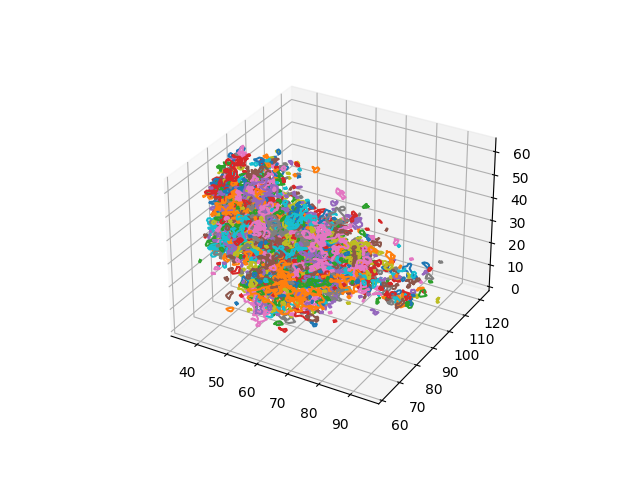

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')
X = []
Y = []
Z = []
for loop in loops:
    if loop.closed:
        lasso_positions = []
        for r in loop.loop:
            pos = [r.res.ax] + list(r.res.pos)
            if pos[0] == 2:
                new_pos = [pos[1]+0.5,pos[2] + 0.5,pos[3]]
            elif pos[0] == 1:
                new_pos = [pos[1]+0.5,pos[2],pos[3]+0.5]
            elif pos[0] == 0:
                new_pos = [pos[1],pos[2] + 0.5,pos[3]+0.5]
                
            lasso_positions.append(new_pos)
        xs = [pos[0] for pos in lasso_positions]
        ys = [pos[1] for pos in lasso_positions]
        zs = [pos[2] for pos in lasso_positions]
        xs = xs 
        ys = ys 
        zs = zs 
        ax.plot(xs,ys,zs)
        Z = Z + zs
        X = X + xs
        Y = Y + ys

X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0 

mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)



In [520]:
d = [len(l.loop) for l in loops]
d  = np.array(d)
np.argmax(d)

139

In [467]:
marker = marker2
unprocess_all(res,marker)
r = Residual(ax=0, ori=1, pos=np.array([ 0, 76,  1]))
d = search_loop(SpinnedResidual(1, r), shape, marker, False)

SpinnedResidual(spin=1, res=Residual(ax=0, ori=1, pos=array([ 0, 76,  1])))

False


ValueError: 

In [5]:
#Analyze Magnitude
chemin_mag = r"C:\Users\0\OneDrive\Documents\Montréal 4A\Les études\Chair AI-SCALE\mag_1.nii"
mag_imgae = nb.load(chemin_mag)
t = 15
mag_data = mag_imgae.get_data()[:,:,:,t]



C:\Users\0\AppData\Local\Temp\ipykernel_18296\236111063.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mag_data = mag_imgae.get_data()[:,:,:,t]


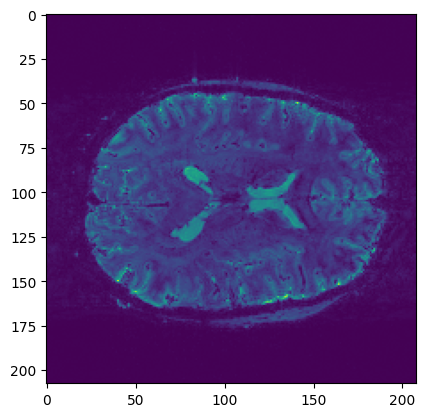

In [6]:
fig2 = plt.figure()
plt.imshow(mag_data[:,:,45])

In [9]:
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

In [64]:

from scipy import ndimage

def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    return (G, theta)

In [65]:

def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

In [66]:

def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return (res, weak, strong)

In [67]:

def hysteresis(img, weak, strong=255):
    M, N = img.shape  
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img

C:\Users\0\AppData\Local\Temp\ipykernel_8244\3311171020.py:7: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  Ix = ndimage.filters.convolve(img, Kx)
C:\Users\0\AppData\Local\Temp\ipykernel_8244\3311171020.py:8: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  Iy = ndimage.filters.convolve(img, Ky)


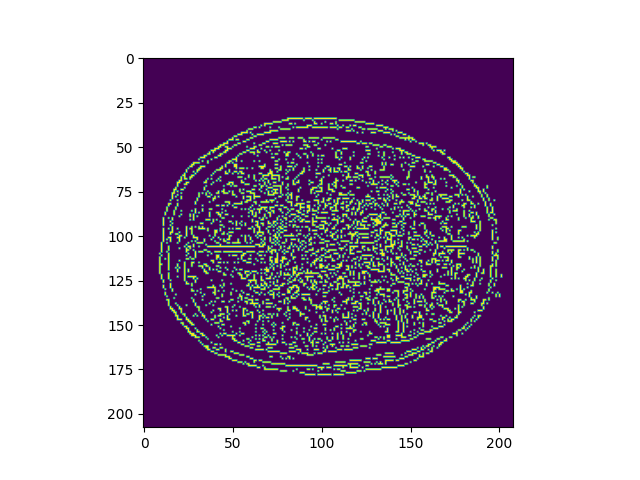

In [68]:
img = mag_data[:,:,46]


G,D = sobel_filters(img)

Z = non_max_suppression(img,D)

res,weak,strong = threshold(Z)

hys = hysteresis(res,weak,strong)
hys = hys / 255
plt.imshow(hys)
plt.show()



C:\Users\0\AppData\Local\Temp\ipykernel_8244\3311171020.py:7: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  Ix = ndimage.filters.convolve(img, Kx)
C:\Users\0\AppData\Local\Temp\ipykernel_8244\3311171020.py:8: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  Iy = ndimage.filters.convolve(img, Ky)


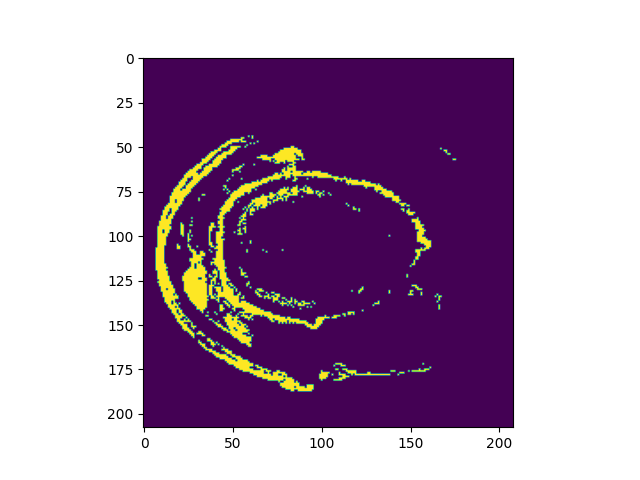

In [70]:
fig3 = plt.figure()
img = mag_data[:,:,2]
M = np.array(img)
M = (M > 10)
G,D = sobel_filters(M)
plt.imshow(M)
plt.show()

In [87]:
import cv2
import numpy as np
img = np.random.random((40,40))
im = np.array(img).astype(np.uint8)
contours, hierarchy = cv2.findContours(im, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [52]:
import os
import matplotlib.pyplot as plt
import nibabel as nb
import numpy as np
import cv2
chemin_mag = r"C:\Users\0\OneDrive\Documents\Montréal 4A\Les études\Chair AI-SCALE\mag_1.nii"
mag_image = nb.load(chemin_mag)
t = 15


mag_data = mag_image.get_data()[:,:,:,t]
img = np.array(mag_data[:,:,40])

_, binary = cv2.threshold(img, 225, 255, cv2.THRESH_BINARY_INV)

img = img
im = img.astype(np.uint8)


C:\Users\0\AppData\Local\Temp\ipykernel_984\2272218081.py:11: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mag_data = mag_image.get_data()[:,:,:,t]


In [216]:
# Parameters


C:\Users\0\AppData\Local\Temp\ipykernel_8244\1742722336.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  data = phase_image.get_data()[:,:,:,t]


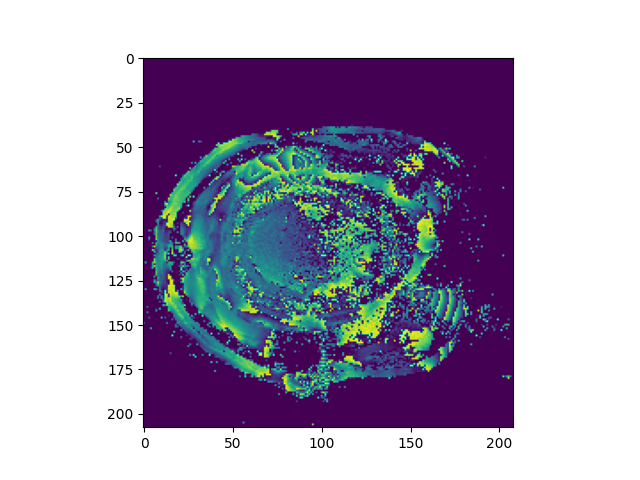

In [154]:
data = phase_image.get_data()[:,:,:,t]
z = 1
b = (np.array(mag_data[:,:,z]).astype(np.uint8) > 1)

plt.imshow(b*np.array(data[:,:,z]))
plt.show()



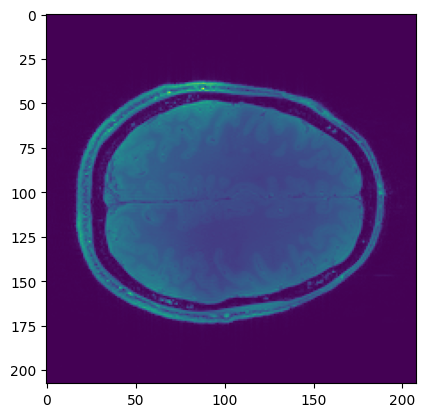

In [194]:
plt.imshow(np.array(mag_data[:,:,69]))